In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [6]:
df=pd.read_csv("Fish_dataset.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# EDA

In [7]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# CHECKING INFORMATION OF DATASET

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# LABEL ENCODER

In [9]:
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder()

In [10]:
df.Species = LE.fit_transform(df.Species)

**LABEL ENCODER** converts the object type variables into the categorical data.Here species is the target variable so it is label encoded.

# To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [11]:
df.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.264151,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.704249,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,3.500000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,6.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# skewness check

In [12]:
df.skew(axis = 0, skipna = True)

Species    0.364400
Weight     1.104450
Length1    0.588482
Length2    0.539863
Length3    0.391541
Height     0.397186
Width      0.004972
dtype: float64

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed,

If the skewness is less than -1 or greater than 1, the data are highly skewed

Here Weight is highly skewed,so it is better to normalize our response varibles 

# CORRELATION CHECK

In [13]:
x_corr = df.corr()
x_corr

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


# CORRELOGRAM

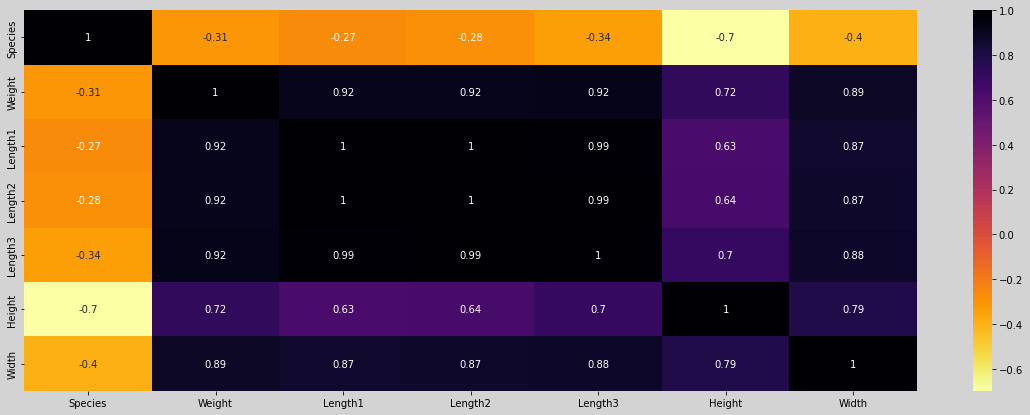

In [14]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='inferno_r');
plt.show()

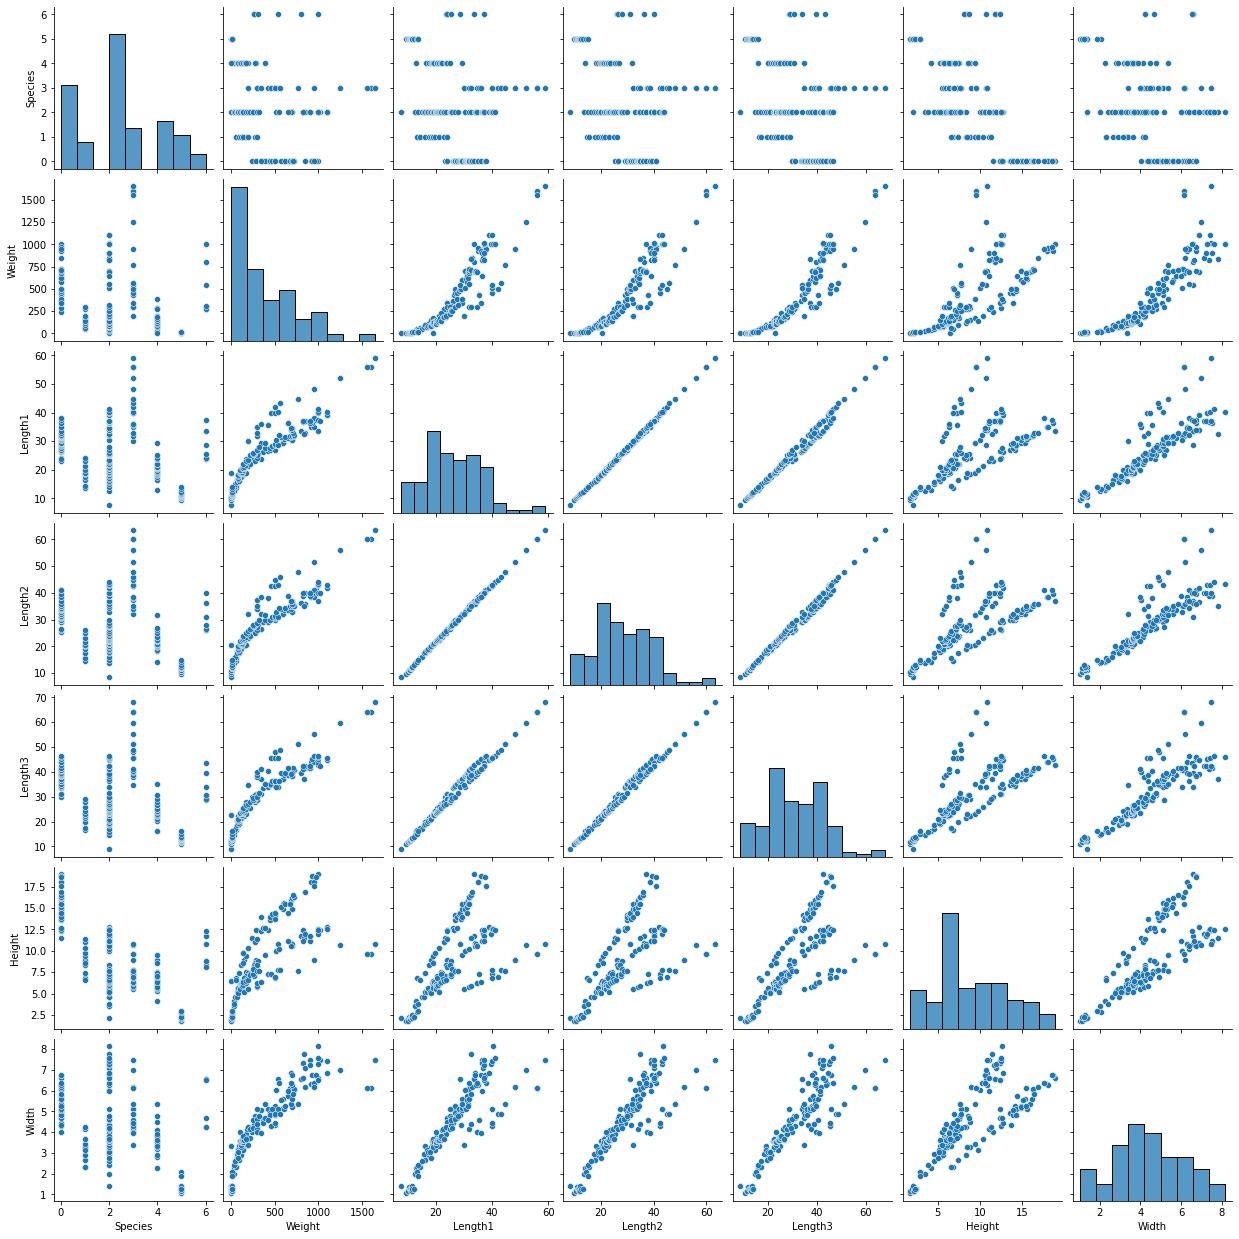

In [15]:
sns.pairplot(df);

# visualization using seaborn

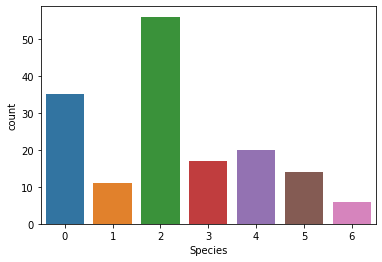

In [16]:
sns.countplot(df['Species']);

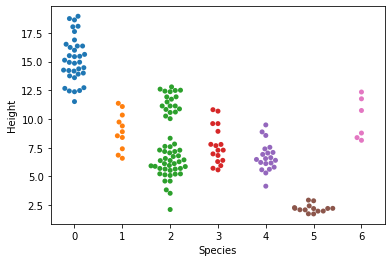

In [17]:
sns.swarmplot(df['Species'],df['Height']);

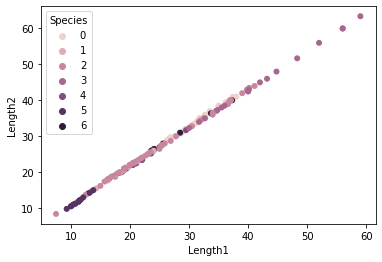

In [18]:
sns.scatterplot(x="Length1", y="Length2",hue="Species",linewidth=0,data=df);

# visualization using cufflinks

In [19]:
df.iplot()

In [20]:
df.iplot(kind="box", boxpoints="outliers",xTitle="FISH Features", title="FISH Features Box Plot")

In [21]:
df[:70].iplot(kind="bubble", x="Height", y="Width", size="Width",
              colors=["tomato"],
              xTitle="Fish Height", yTitle="Fish Width",
              title="Fish Height vs Fish Width Bubble Chart")

In [22]:
df[:100].iplot(kind="bubble3d", x="Height", y="Width",z="Species", size="Width",
              colors=["dodgerblue", "lime", "tomato"],
              xTitle="Fish Height", yTitle="Fish Width",
              title="Fish Height vs Fish Width vs Fish Type Bubble Chart")

In [23]:
df[:100].iplot(kind="scatter3d", x="Height", y="Width",z="Weight", size=20,
              colors=["dodgerblue", "lime", "tomato"],
              xTitle="Fish Height", yTitle="Fish Width",
              title="Fish Height vs Fish Width vs Fish Weight Scatter Chart")

# outliers removal using IQR

In [24]:
df.shape

(159, 7)

In [25]:
def removeOutliers(df, col):
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1
     
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = df.loc[df[col].isin(outlier_free_list)]
 
 
for i in df.columns:
    removeOutliers(df, i)
 
# Assigning filtered data back to our original variable
df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column Species is: 2.5
IQR value for column Weight is: 530.0
IQR value for column Length1 is: 13.650000000000002
IQR value for column Length2 is: 14.5
IQR value for column Length3 is: 16.500000000000007
IQR value for column Height is: 6.4211
IQR value for column Width is: 2.19885
Shape of data after outlier removal is:  (159, 7)


# creating target and response variable for model building

In [26]:
x_ind=df.drop('Species',axis=1)
y_dep=df.Species

# NORMALIZATION OF RESPONSE VARIABLE

In [27]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()

In [28]:
x_norm=norm.fit_transform(x_ind)

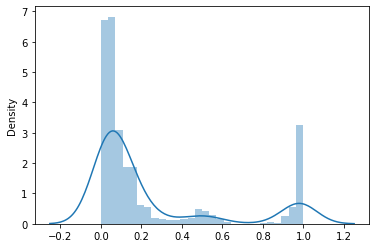

In [29]:
sns.distplot(x_norm);

# model data selection for train and validation phase

In [30]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.2,random_state=2)

# Hyper Parameter Tuning For SVM

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [39]:
kernel=['linear','rbf','poly','sigmoid']

In [40]:
for i in kernel:
 model1=SVC(kernel=i)
 model1=model1.fit(x_train,y_train)
 print('kernel:',i)
 print('Accuracy Score:',accuracy_score(y_test,model1.predict(x_test)) *100)

kernel: linear
Accuracy Score: 93.75
kernel: rbf
Accuracy Score: 40.625
kernel: poly
Accuracy Score: 25.0
kernel: sigmoid
Accuracy Score: 37.5


**A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.**

# SVC for multiclass problem with best kernal trick

In [41]:
from sklearn.svm import SVC

In [42]:
model_SVM=SVC(kernel= 'linear' )

In [43]:
f_model=model_SVM.fit(x_train,y_train)

In [44]:
y_pred_SVM = model_SVM.predict(x_test)
y_pred_SVM

array([0, 0, 5, 0, 3, 3, 1, 3, 0, 3, 2, 2, 3, 2, 4, 4, 0, 0, 0, 6, 4, 2,
       2, 4, 0, 3, 1, 2, 2, 0, 2, 3])

# CONFUSION MATRIX AND ACCURACY OF LOGISTICS REGRESSION

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
cnf=confusion_matrix(y_test,y_pred_SVM)

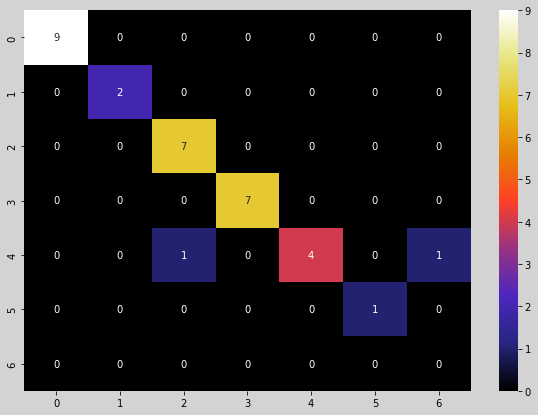

In [47]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='CMRmap');
plt.show()

In [48]:
accuracy_score(y_test,y_pred_SVM) * 100

93.75

# Classification Report

In [49]:
from sklearn.metrics import classification_report

In [50]:
Rep=classification_report(y_test,y_pred_SVM)
print(Rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         2
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         7
           4       1.00      0.67      0.80         6
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0

    accuracy                           0.94        32
   macro avg       0.84      0.81      0.82        32
weighted avg       0.97      0.94      0.95        32



# THE PREDICTED SUPPORT VECTOR CLASSIFICATION LINEAR MODEL FOR 6 SPECIES TYPE HAS ACCURACY OF 94%